<a href="https://colab.research.google.com/github/Nisha0202/Data-Analysis/blob/main/Dataset3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


In [ ]:
csv_file_name = "exams.csv"

In [ ]:
df = pd.read_csv( csv_file_name )
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [ ]:
target_column_name = "math score" #taking Final grades as targeted coloumn

In [ ]:

categorical_target_column = False


In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 1000
Total Number of Columns : 8


In [ ]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

62    32
74    30
59    29
67    29
68    28
      ..
21     1
25     1
15     1
24     1
27     1
Name: math score, Length: 79, dtype: int64


**Observation**

Not categorical data

Text(0.5, 1.0, 'Total Number of Null values for Each Column')

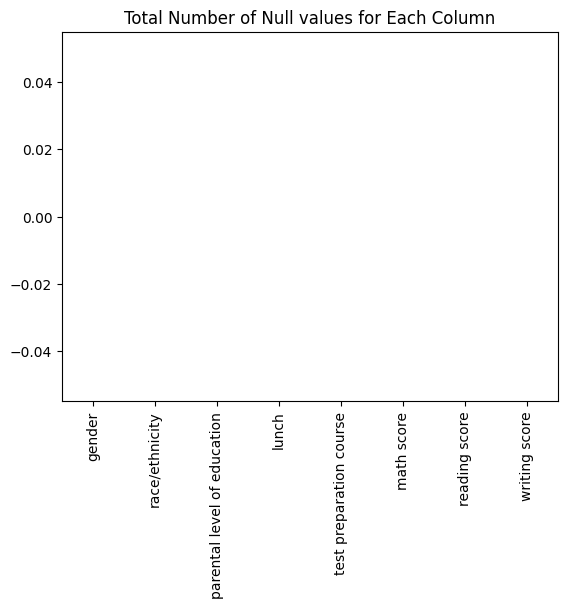

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


**Observation**

No null values in this dataset

In [ ]:
droped_column_names = [ "race/ethnicity", "parental level of education" ]

df.drop( droped_column_names , axis = 1 ,inplace = True)


**Observation**

race/ethnicity has none descriptive value, parental level of education has unique values

In [ ]:
df

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,completed,59,70,78
1,male,standard,none,96,93,87
2,female,free/reduced,none,57,76,77
3,male,free/reduced,none,70,70,63
4,female,standard,none,83,85,86
...,...,...,...,...,...,...
995,male,standard,none,77,77,71
996,male,standard,none,80,66,66
997,female,standard,completed,67,86,86
998,male,standard,none,80,72,62


In [ ]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')



Maximum Null values in column (Before Handling)  : 0

------Replaced Null Values-------

Maximum Null values in column (After Handling)  : 0


In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    99.9
True      0.1
dtype: float64


**Observation**

99.9% data is unique(no duplication)

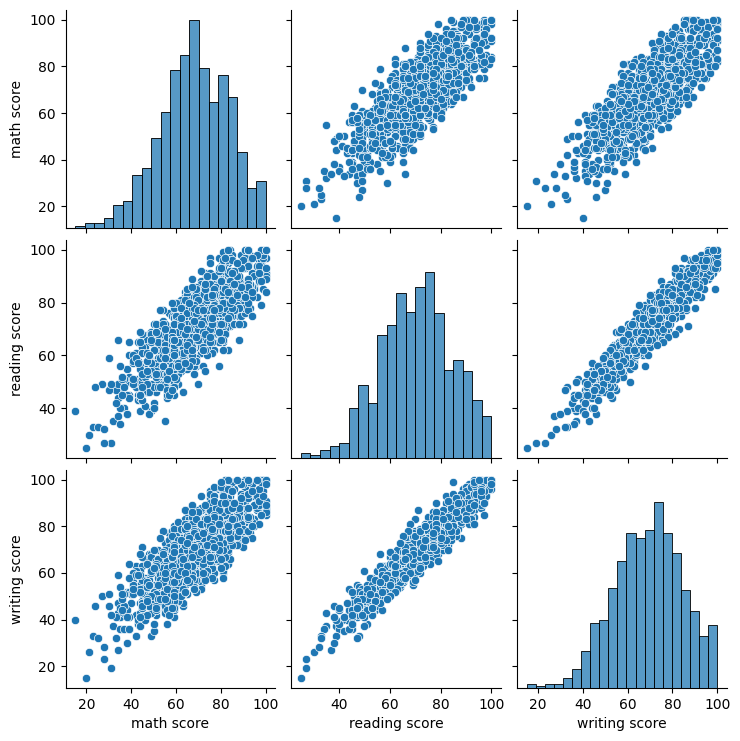

In [ ]:
#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

**OBSERVATION**

From the pair plot above some of the observations are :-  
1. **math score:** From the histogram analysis we can see the gradesin math are left-skewed. Most of the students scored more than 60.
2. **reading score and writing score:** Both are left-skewed and has linear correlation as seems in the scatter plot.
3. **reading score and writing score and math score:** Three of them has linear relation. the students who are good in reading and writhing also scores well in maths.




In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   lunch                    1000 non-null   object
 2   test preparation course  1000 non-null   object
 3   math score               1000 non-null   int64 
 4   reading score            1000 non-null   int64 
 5   writing score            1000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


-----------------Unique Values per column--------------------------------




gender                      2
lunch                       2
test preparation course     2
math score                 79
reading score              71
writing score              74
dtype: int64

In [ ]:
categorical_columns = ["gender", "lunch", "test preparation course", ]
numeric_columns = [ "reading score", "writing score" , "math score"]

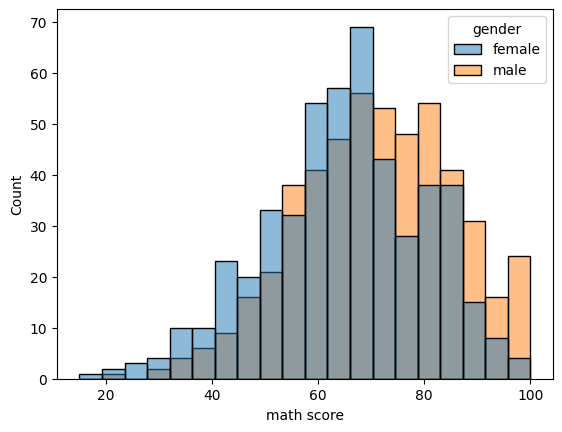

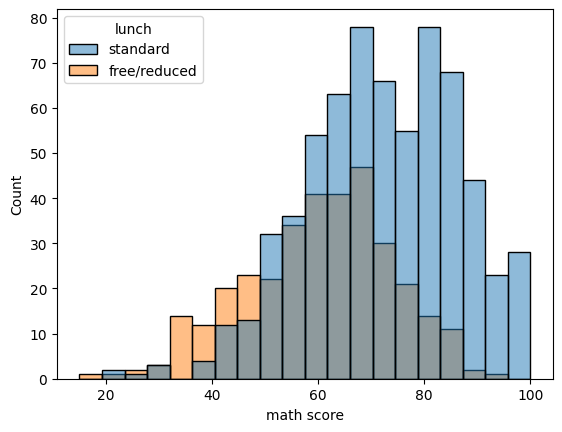

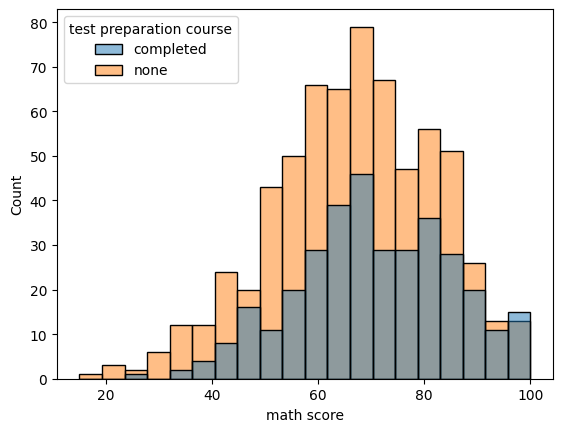

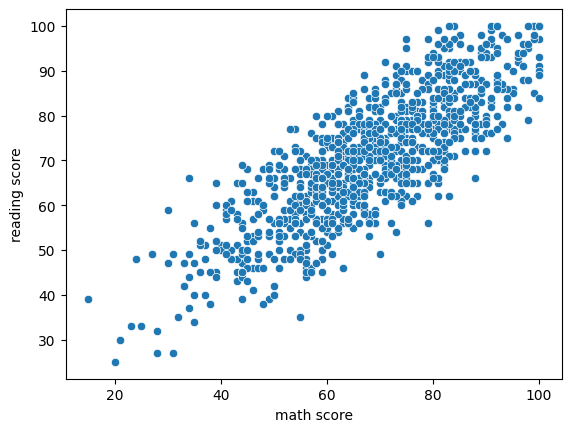

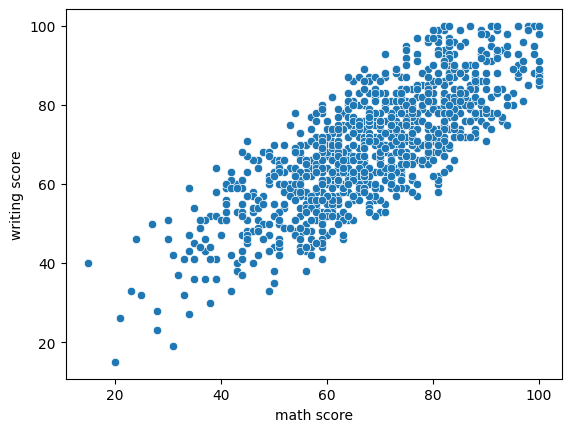

In [ ]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:
      #sns.barplot(x=column, y='Counts', hue= target_column_name, data= df.groupby([column, target_column_name]).size().reset_index(name="Counts"))
      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.histplot( x = column , hue = target_column_name , data = df)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.show()



**OBSERVATION**

1. **gender and math score:** Male students performing better in maths.
2. **lunch and mathscore:** Srudents who are eating standard lunch scoring better in maths.


In [ ]:
df

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,completed,59,70,78
1,male,standard,none,96,93,87
2,female,free/reduced,none,57,76,77
3,male,free/reduced,none,70,70,63
4,female,standard,none,83,85,86
...,...,...,...,...,...,...
995,male,standard,none,77,77,71
996,male,standard,none,80,66,66
997,female,standard,completed,67,86,86
998,male,standard,none,80,72,62


In [ ]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)

**OBSERVATION**

target_column_name not categorical


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   lunch                    1000 non-null   object
 2   test preparation course  1000 non-null   object
 3   math score               1000 non-null   int64 
 4   reading score            1000 non-null   int64 
 5   writing score            1000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


<Axes: >

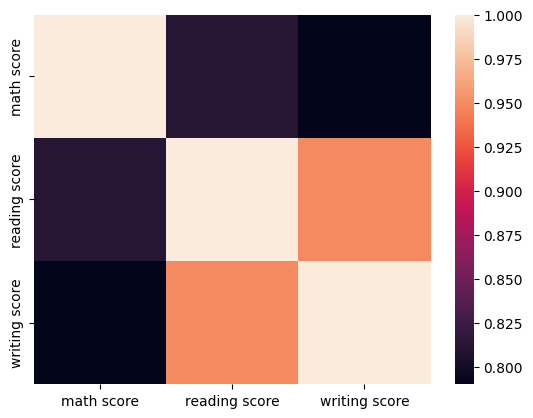

In [ ]:
#Correlation HeatMap for numeric columns among the dataset
sns.heatmap(df.corr( numeric_only =  True))

**OBSERVATION**


1. A strong positive correlation has been observed between the "writing score" and "math score" columns. The better you are at writing the better chances you are good in maths.







In [ ]:
#svm

In [ ]:
df = pd.read_csv( csv_file_name )
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


Features and labels are stored in different variables. Categorical columns are encoded using OrdinalEncoder .

In [ ]:

X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [ ]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

You Need to use Linear Regression as your target column in Numeric


In [ ]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

You Need to use Linear Regression as your target column in Numeric


In [ ]:
# Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error of the predictions
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 28.363899919890173


**Observation**

The model trying to predict math score based on the datas. The MSE value indicates the average squared error of your model’s predictions. for a small number like math score, MSE of 28.26 might be good.